In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import decomposition
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# # Getting data

In [11]:
test = pd.read_csv(r'C:\Users\Ryan\Desktop\TTS\datasets\titanic\test.csv')
train = pd.read_csv(r'C:\Users\Ryan\Desktop\TTS\datasets\titanic\train.csv')

#check for missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# # Data processing: charts, graphs, etc.

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

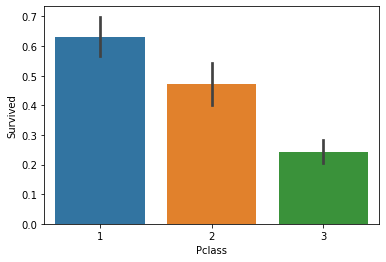

In [12]:
#bar plot of people survived vs passenger class
sns.barplot(train.Pclass, train.Survived)

Text(0, 0.5, 'Survival rate')

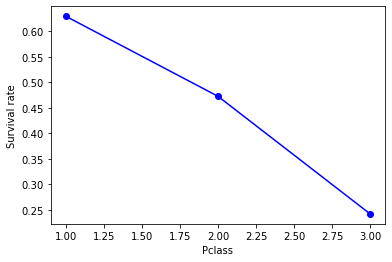

In [13]:
#plot of survival rate vs passenger class
#survival rate has steep decrease as passenger class goes from 1st class to 3rd class

pclsurv = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
x_pcl = pclsurv.iloc[:, :1]
y_pcl = pclsurv.iloc[:,1:2]
plt.plot(x_pcl, y_pcl, 'bo-')
plt.xlabel('Pclass')
plt.ylabel('Survival rate')





In [14]:
#those survived by pclass
survived = train[train['Survived'] == 1]
surv1 = survived[survived['Pclass'] == 1]
surv2 = survived[survived['Pclass'] == 2]
surv3 = survived[survived['Pclass'] == 3]

#those deceased by pclass
deceased = train[train['Survived'] == 0]
dec1 = deceased[deceased['Pclass'] == 1]
dec2 = deceased[deceased['Pclass'] == 2]
dec3 = deceased[deceased['Pclass'] == 3]

#calculate bins for histogram

#survived
s1min = surv1.Fare.min()
s1max = surv1.Fare.max()
s1delta= round((s1max-s1min)/10)

s2min = surv2.Fare.min()
s2max = surv2.Fare.max()
s2delta = round((s2max-s2min)/10)

s3min = surv3.Fare.min()
s3max = surv3.Fare.max()
s3delta = round((s3max-s3min)/10)

#deceased
d1min = dec1.Fare.min()
d1max = dec1.Fare.max()
d1delta= round((d1max-d1min)/10)

d2min = dec2.Fare.min()
d2max = dec2.Fare.max()
d2delta= round((d2max-d2min)/10)

d3min = dec3.Fare.min()
d3max = dec3.Fare.max()
d3delta= round((d3max-d3min)/10)



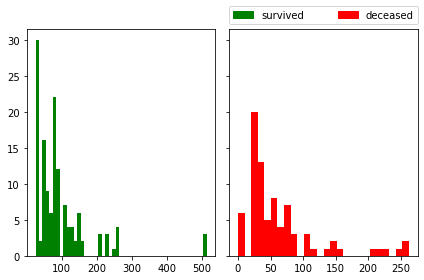

In [15]:
#histogram of survived and deceased by fare in pclass 1
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)

ax[0].hist(surv1.Fare, bins=s1delta, color='g')
ax[1].hist(dec1.Fare, bins=d1delta, color='r')
import matplotlib.patches as mpatches
green = mpatches.Patch(color='green', label='survived')
red = mpatches.Patch(color='red', label='deceased')
plt.legend(handles=[green, red], bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

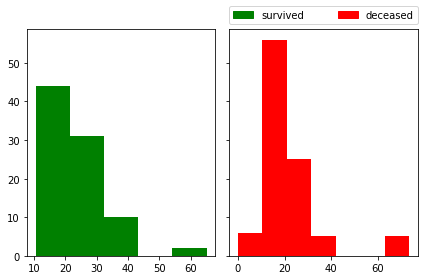

In [16]:
#histogram of survived and deceased by fare in pclass 2
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)

ax[0].hist(surv2.Fare, bins=s2delta, color='g')
ax[1].hist(dec2.Fare, bins=d2delta, color='r')

plt.legend(handles=[green, red], bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

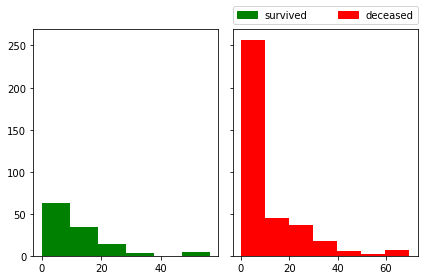

In [17]:
#histogram of survived and deceased by fare in pclass 3
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)

ax[0].hist(surv3.Fare, bins=s3delta, color='g')
ax[1].hist(dec3.Fare, bins=d3delta, color='r')

plt.legend(handles=[green, red], bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

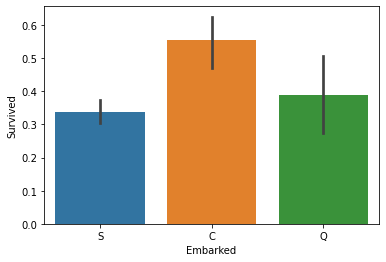

In [18]:
#survival by embarkment
sns.barplot(train.Embarked, train.Survived)


C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0

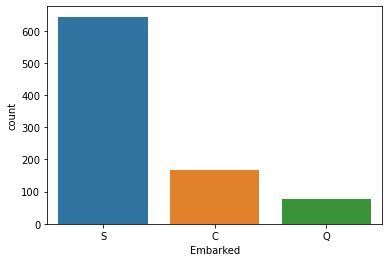

In [19]:
#number of embarkment
sns.countplot(train.Embarked)

#fill nan values in embarked with S
train.Embarked = train.Embarked.fillna("S")
train.Embarked = train.Embarked.replace(3,'S')

#check if filled
train.Embarked.isnull().sum()



C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ages', ylabel='count'>

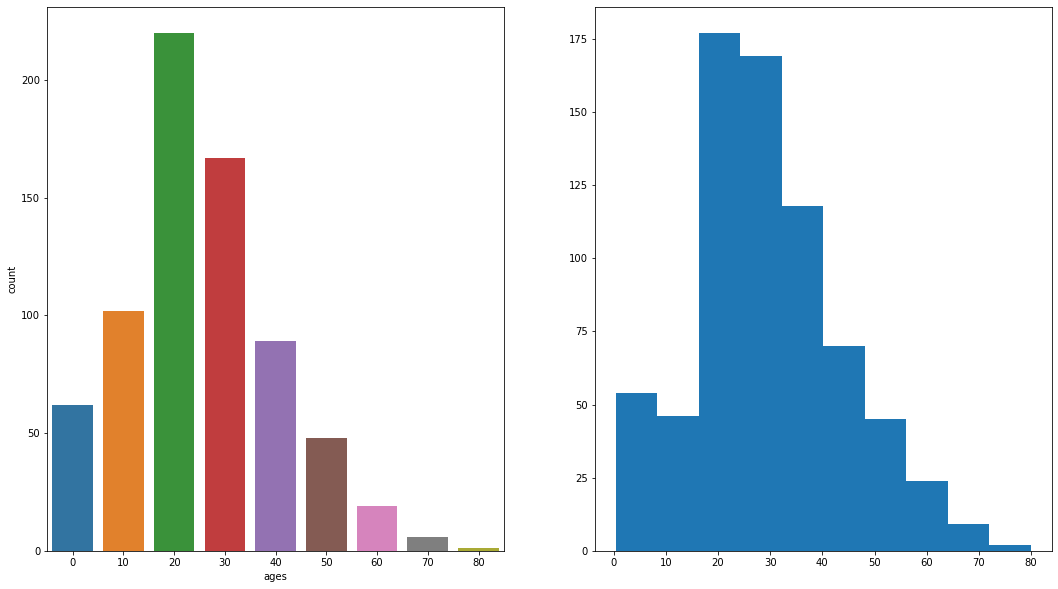

In [20]:
#age distribution
fig, ax = plt.subplots(1,2, figsize = (18,10))
plt.hist(train.Age)

train['Ages'] = pd.cut(x=train['Age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89])

train['ages'] = pd.cut(x=train['Age'], 
                            bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89], 
                            labels=['0', '10', '20', '30', '40', '50', '60', '70', '80'])
sns.countplot(train.ages, ax=ax[0])


C:\Users\Ryan\anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


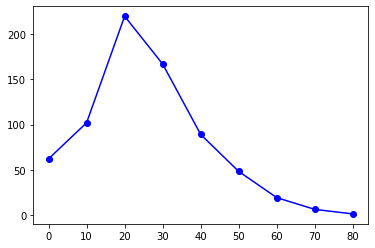

In [21]:
#survival by age
plt.plot(train.groupby(['ages']).Survived.count(), 'bo-')

In [22]:
train.groupby(['Sex', 'Pclass', 'Embarked']).Age.mean()

Sex     Pclass  Embarked
female  1       C           36.052632
                Q           33.000000
                S           33.456522
        2       C           19.142857
                Q           30.000000
                S           29.719697
        3       C           14.062500
                Q           22.850000
                S           23.223684
male    1       C           40.111111
                Q           44.000000
                S           41.897188
        2       C           25.937500
                Q           57.000000
                S           30.875889
        3       C           25.016800
                Q           28.142857
                S           26.574766
Name: Age, dtype: float64

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Ages           177
ages           177
dtype: int64

In [24]:
#help from kevin
train.Age = train.groupby(['Sex', 'Pclass', 'Embarked'])['Age'].apply(lambda x: x.fillna(x.mean()))
test.Age = test.groupby(['Sex', 'Pclass', 'Embarked'])['Age'].apply(lambda x: x.fillna(x.mean()))


C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

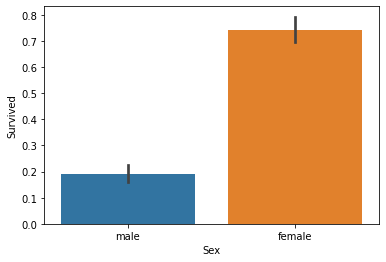

In [25]:
#survival by sex
#train.groupby('Sex').Survived.mean()
barplot_sex = sns.barplot(train.Sex, train.Survived)
plt.bar_label(barplot_sex.containers[0],size=16,label_type='center')

# # ML

In [26]:
train.Sex = train.Sex.replace('female', 1)
train.Sex = train.Sex.replace('male', 2)

train.Embarked = train.Embarked.replace('C', 1)
train.Embarked = train.Embarked.replace('Q', 2)
train.Embarked = train.Embarked.replace('S', 3)



train = train.drop(['PassengerId', 'Name', 'Ticket',  'Cabin', 'Ages', 'ages'], axis=1)
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.000000,1,0,7.2500,3
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,3
3,1,1,1,35.000000,1,0,53.1000,3
4,0,3,2,35.000000,0,0,8.0500,3
5,0,3,2,28.142857,0,0,8.4583,2
6,0,1,2,54.000000,0,0,51.8625,3
7,0,3,2,2.000000,3,1,21.0750,3
8,1,3,1,27.000000,0,2,11.1333,3
9,1,2,1,14.000000,1,0,30.0708,1


In [27]:
test.Sex = train.Sex.replace('female', 1)
test.Sex = train.Sex.replace('male', 2)

test.Embarked = test.Embarked.replace('C', 1)
test.Embarked = test.Embarked.replace('Q', 2)
test.Embarked = test.Embarked.replace('S', 3)


test = test.drop(['PassengerId', 'Name', 'Ticket',  'Cabin'], axis=1)



In [28]:
#where is missing data
null_data = test[test.isnull().any(axis=1)]
print(null_data)

#find average fare with same characteristics
print(test.groupby(['Pclass', 'Embarked']).Fare.mean())

test.Fare = test.groupby(['Pclass', 'Embarked'])['Fare'].apply(lambda x: x.fillna(x.mean()))

test.isnull().sum()

     Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
152       3    2  60.5      0      0   NaN         3
Pclass  Embarked
1       1           110.073511
        2            90.000000
        3            76.677504
2       1            20.120445
        2            11.273950
        3            23.056090
3       1            10.658700
        2             8.998985
        3            13.913030
Name: Fare, dtype: float64


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
y = train.Survived
x_train = train.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_train, y, test_size=0.25)


from sklearn.ensemble import RandomForestClassifier
predictions = RandomForestClassifier(n_estimators=100)
predictions.fit(Xtrain, ytrain)
#result = predictions.predict(Xtest)
#print(metrics.accuracy_score(ytest, result))

to_submit = predictions.predict(test)
